In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data=pd.read_csv("MagicBricks.csv")
data.dropna(inplace=True)
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [22]:
from sklearn.model_selection import train_test_split
x=data.drop(['Price'],axis=1)
y=data['Price']
x

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,Ready_to_move,Resale,Builder_Floor,12916.0


In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

array([[<AxesSubplot: title={'center': 'Area'}>,
        <AxesSubplot: title={'center': 'BHK'}>],
       [<AxesSubplot: title={'center': 'Bathroom'}>,
        <AxesSubplot: title={'center': 'Parking'}>],
       [<AxesSubplot: title={'center': 'Per_Sqft'}>,
        <AxesSubplot: title={'center': 'Price'}>]], dtype=object)

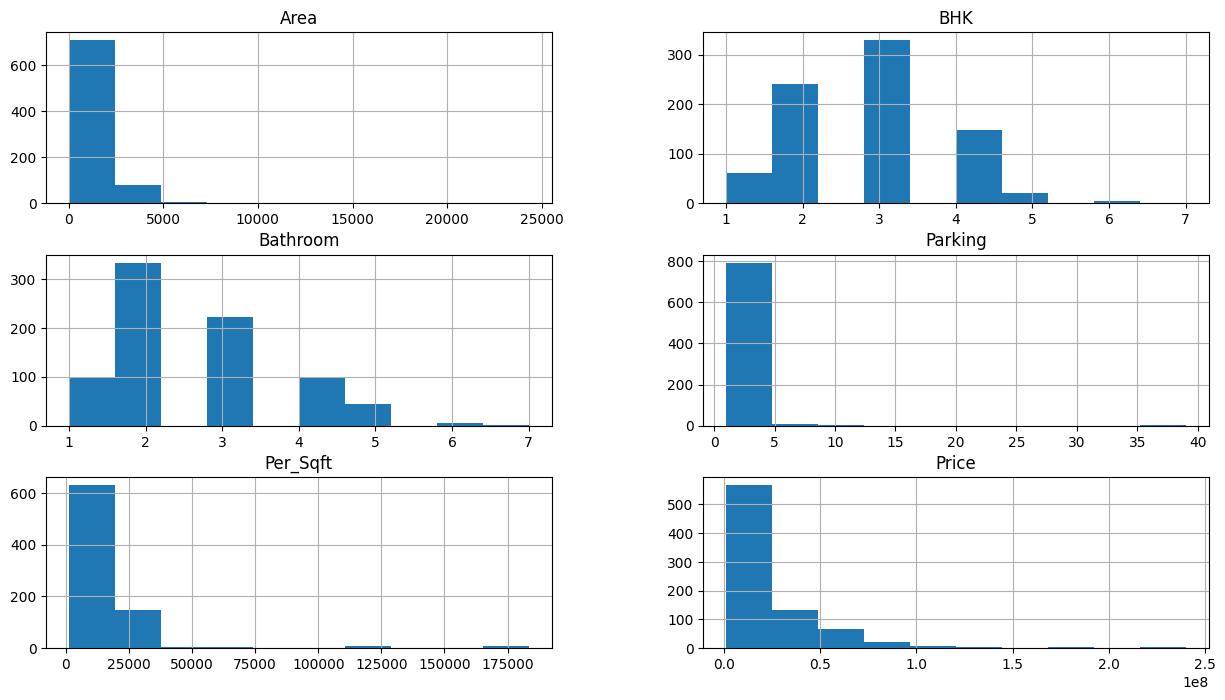

In [24]:
train_data=X_train.join(Y_train)  
train_data.hist(figsize=(15,8))

C:\msys64\mingw64\bin\ipykernel_14016\2405447373.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")


<AxesSubplot: >

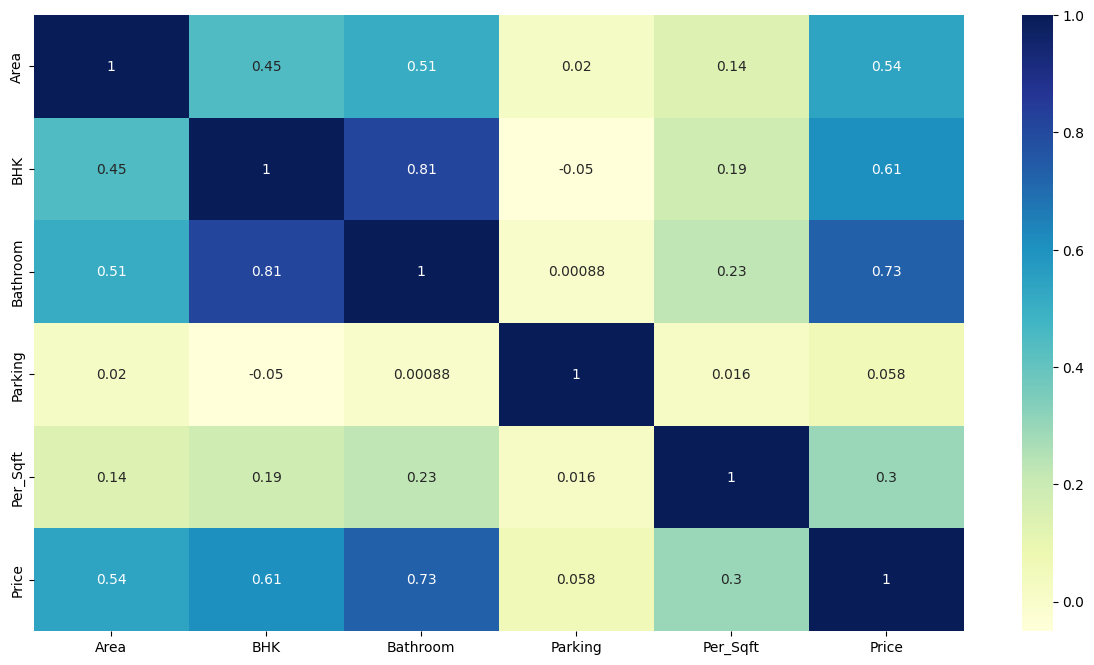

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [26]:
train_data['Parking']=np.log(train_data['Parking']+1)
train_data['Area']=np.log(train_data['Area']+1)
train_data['BHK']=np.log(train_data['BHK']+1)
train_data['Bathroom']=np.log(train_data['Bathroom']+1)
train_data['Per_Sqft']=np.log(train_data['Per_Sqft']+1)


In [27]:

train_data=train_data.join(pd.get_dummies(train_data.Type)).drop(['Type'],axis=1)
train_data=train_data.join(pd.get_dummies(train_data.Status)).drop(['Status'],axis=1)
train_data=train_data.join(pd.get_dummies(train_data.Furnishing)).drop(['Furnishing'],axis=1)
train_data=train_data.join(pd.get_dummies(train_data.Transaction)).drop(['Transaction'],axis=1)
train_data

,Area,BHK,Bathroom,Locality,Parking,Per_Sqft,Price,Apartment,Builder_Floor,Almost_ready,Ready_to_move,Furnished,Semi-Furnished,Unfurnished,New_Property,Resale
293,6.908755,1.098612,1.098612,"Kailash Colony, Greater Kailash",0.693147,9.948987,15000000,0,1,0,1,0,0,1,0,1
768,7.378384,1.386294,1.386294,"New Manglapuri, Sultanpur",0.693147,8.220134,10800000,0,1,0,1,0,0,1,0,1
829,6.951866,1.386294,1.098612,Mehrauli,0.693147,8.054840,6000000,0,1,0,1,0,0,1,0,1
954,7.280008,1.098612,1.098612,Dilshad Garden,0.693147,8.556606,7000000,1,0,0,1,0,0,1,0,1
107,7.244942,1.386294,1.386294,Lajpat Nagar 3,0.693147,12.119065,32500000,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,8.343078,1.791759,1.791759,"Friends Colony East, New Friends Colony",1.098612,9.646011,135500000,0,1,0,1,0,1,0,1,0
561,7.438972,1.386294,1.386294,Saket,1.098612,9.778378,30000000,0,1,0,1,0,1,0,0,1
1154,7.003974,1.098612,1.098612,Alaknanda,1.098612,9.433564,15000000,1,0,0,1,0,0,1,0,1
940,6.685861,1.386294,1.098612,Dilshad Garden,0.693147,9.127067,9030000,1,0,0,1,0,1,0,0,1


C:\msys64\mingw64\bin\ipykernel_14016\2405447373.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")


<AxesSubplot: >

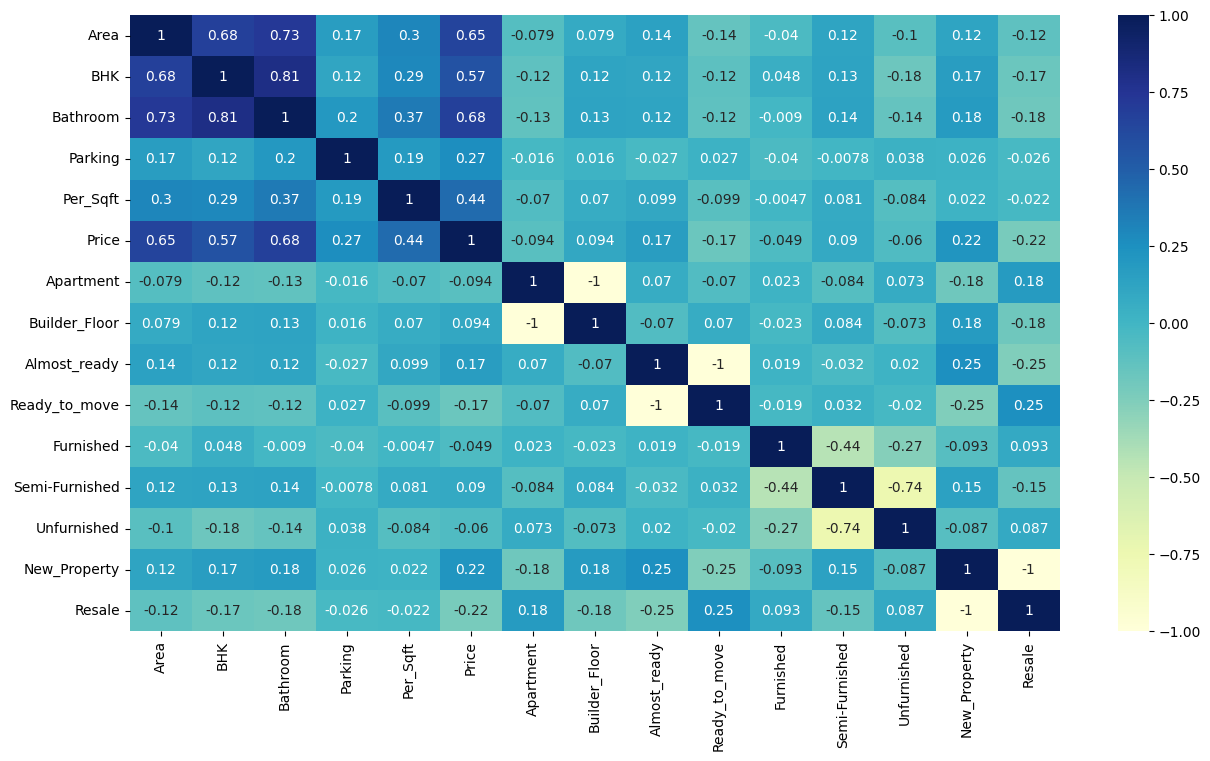

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [29]:
train_data['Bathroom_ratio']=train_data['Bathroom'] / train_data['BHK']
train_data=train_data.drop(['Locality'],axis=1)

In [30]:
train_data['Furnished']=np.log(train_data['Furnished']+1)
train_data['Semi-Furnished']=np.log(train_data['Semi-Furnished']+1)
train_data['Unfurnished']=np.log(train_data['Unfurnished']+1)
train_data['Apartment']=np.log(train_data['Apartment']+1)
train_data['Builder_Floor']=np.log(train_data['Builder_Floor']+1)

array([[<AxesSubplot: title={'center': 'Area'}>,
        <AxesSubplot: title={'center': 'BHK'}>,
        <AxesSubplot: title={'center': 'Bathroom'}>,
        <AxesSubplot: title={'center': 'Parking'}>],
       [<AxesSubplot: title={'center': 'Per_Sqft'}>,
        <AxesSubplot: title={'center': 'Price'}>,
        <AxesSubplot: title={'center': 'Apartment'}>,
        <AxesSubplot: title={'center': 'Builder_Floor'}>],
       [<AxesSubplot: title={'center': 'Almost_ready'}>,
        <AxesSubplot: title={'center': 'Ready_to_move'}>,
        <AxesSubplot: title={'center': 'Furnished'}>,
        <AxesSubplot: title={'center': 'Semi-Furnished'}>],
       [<AxesSubplot: title={'center': 'Unfurnished'}>,
        <AxesSubplot: title={'center': 'New_Property'}>,
        <AxesSubplot: title={'center': 'Resale'}>,
        <AxesSubplot: title={'center': 'Bathroom_ratio'}>]], dtype=object)

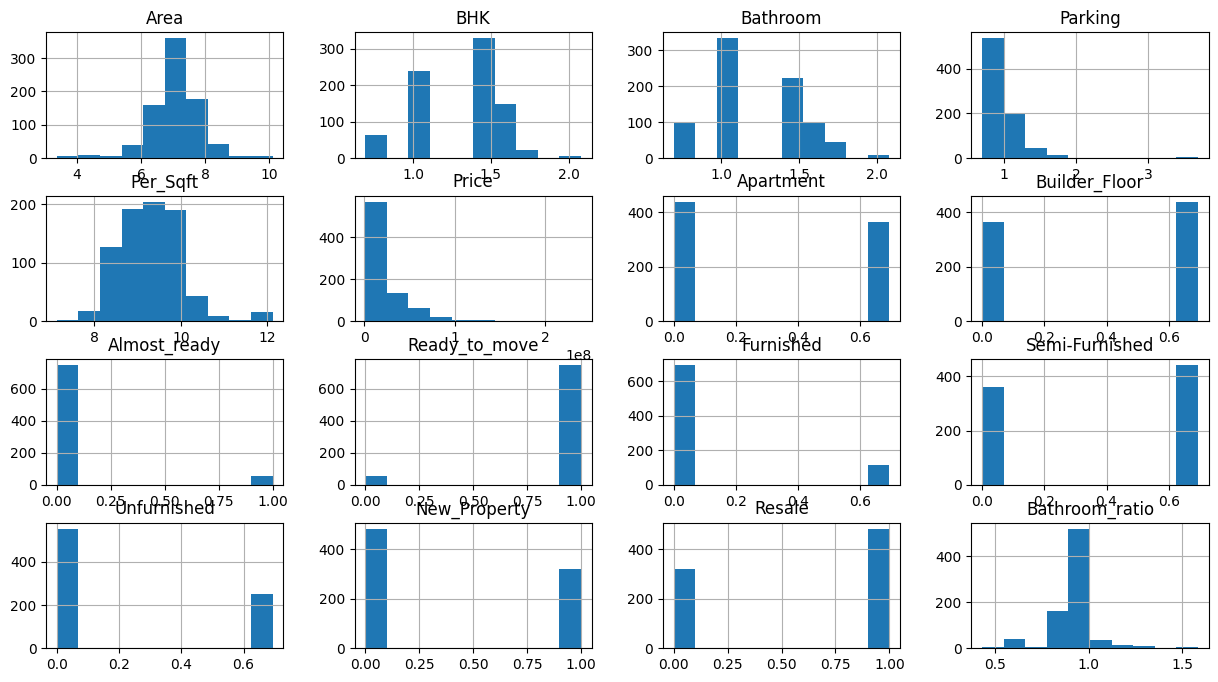

In [31]:
train_data.hist(figsize=(15,8))

array([[<AxesSubplot: title={'center': 'Area'}>,
        <AxesSubplot: title={'center': 'BHK'}>,
        <AxesSubplot: title={'center': 'Bathroom'}>,
        <AxesSubplot: title={'center': 'Parking'}>],
       [<AxesSubplot: title={'center': 'Per_Sqft'}>,
        <AxesSubplot: title={'center': 'Price'}>,
        <AxesSubplot: title={'center': 'Apartment'}>,
        <AxesSubplot: title={'center': 'Builder_Floor'}>],
       [<AxesSubplot: title={'center': 'Almost_ready'}>,
        <AxesSubplot: title={'center': 'Ready_to_move'}>,
        <AxesSubplot: title={'center': 'Furnished'}>,
        <AxesSubplot: title={'center': 'Semi-Furnished'}>],
       [<AxesSubplot: title={'center': 'Unfurnished'}>,
        <AxesSubplot: title={'center': 'New_Property'}>,
        <AxesSubplot: title={'center': 'Resale'}>,
        <AxesSubplot: title={'center': 'Bathroom_ratio'}>]], dtype=object)

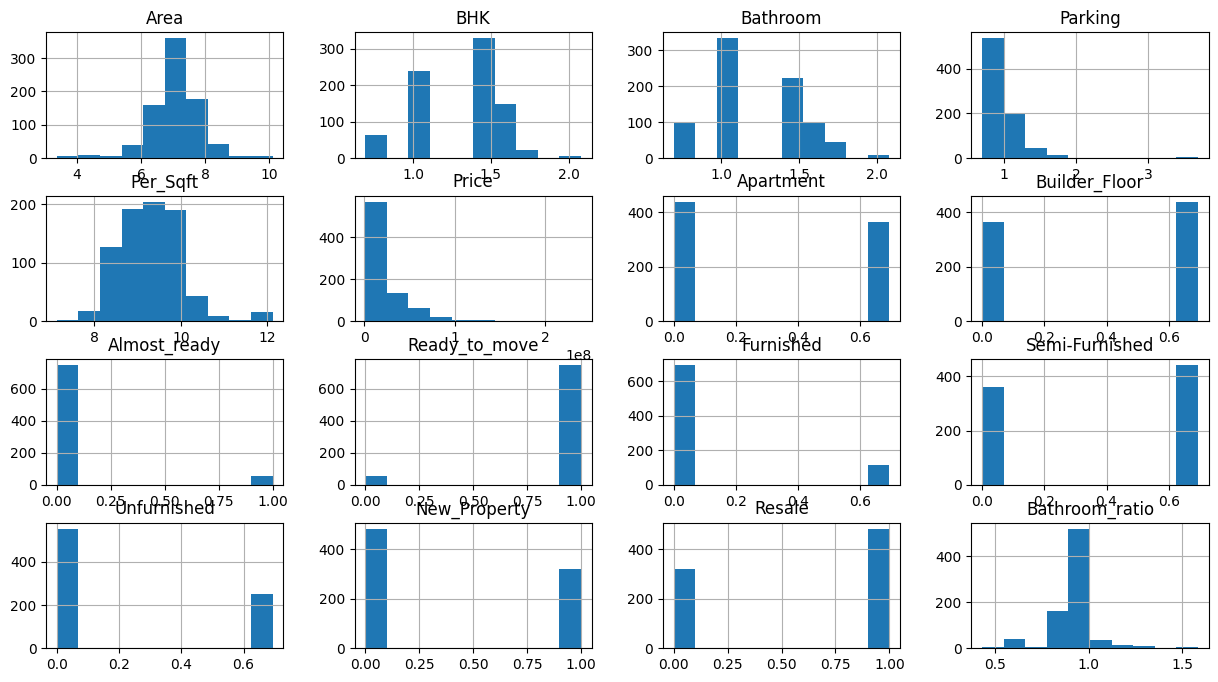

In [32]:
train_data.hist(figsize=(15,8))

<AxesSubplot: >

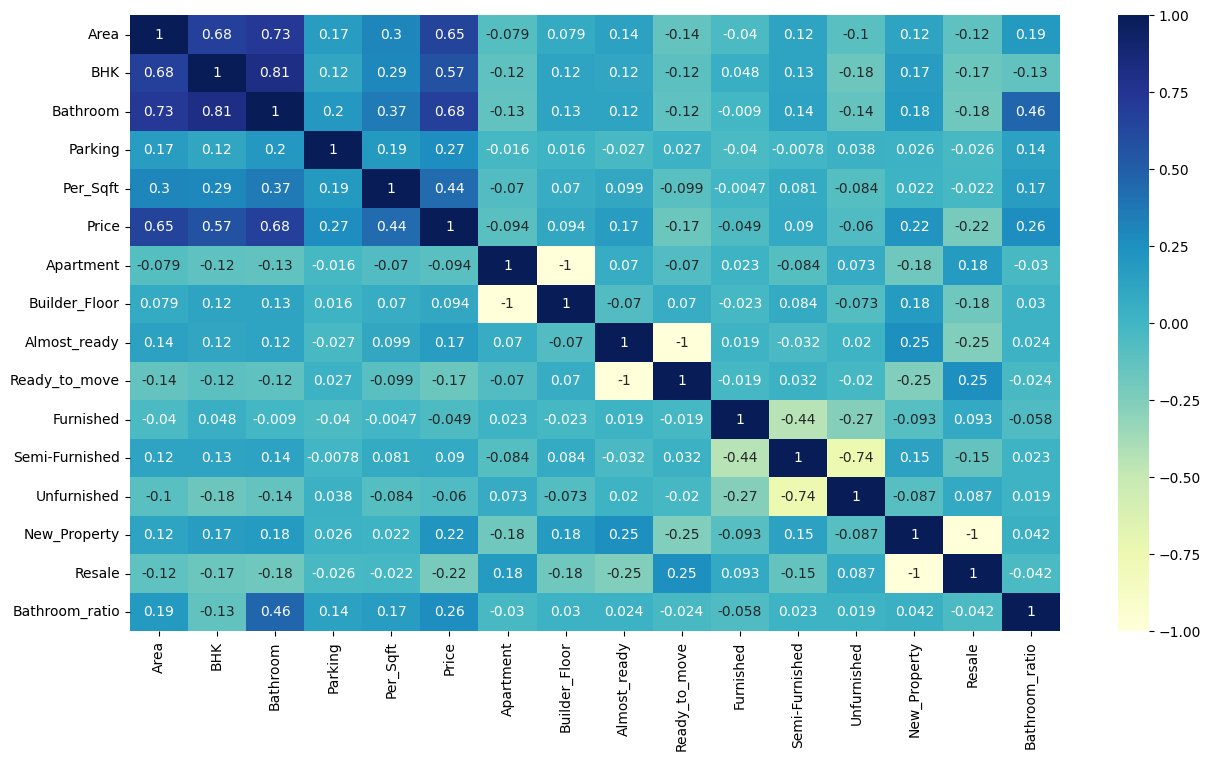

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train,y_train=train_data.drop(['Price'],axis=1),train_data['Price']
x_train_s=scaler.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_train_s,y_train)

LinearRegression()

In [35]:

test_data=X_test.join(Y_test)
test_data=test_data.join(pd.get_dummies(test_data.Type)).drop(['Type'],axis=1)
test_data=test_data.join(pd.get_dummies(test_data.Status)).drop(['Status'],axis=1)
test_data=test_data.join(pd.get_dummies(test_data.Furnishing)).drop(['Furnishing'],axis=1)
test_data=test_data.join(pd.get_dummies(test_data.Transaction)).drop(['Transaction'],axis=1)
test_data['Parking']=np.log(test_data['Parking']+1)  
test_data['Area']=np.log(test_data['Area']+1)
test_data['BHK']=np.log(test_data['BHK']+1)
test_data['Bathroom']=np.log(test_data['Bathroom']+1)
test_data['Per_Sqft']=np.log(test_data['Per_Sqft']+1)
test_data['Furnished']=np.log(test_data['Furnished']+1)
test_data['Semi-Furnished']=np.log(test_data['Semi-Furnished']+1)
test_data['Unfurnished']=np.log(test_data['Unfurnished']+1)
test_data['Apartment']=np.log(test_data['Apartment']+1)
test_data['Builder_Floor']=np.log(test_data['Builder_Floor']+1)
test_data['Bathroom_ratio']=test_data['Bathroom'] / test_data['BHK']
test_data=test_data.drop(['Locality'],axis=1)
test_data

,Area,BHK,Bathroom,Parking,Per_Sqft,Price,Apartment,Builder_Floor,Almost_ready,Ready_to_move,Furnished,Semi-Furnished,Unfurnished,New_Property,Resale,Bathroom_ratio
457,7.601402,1.386294,1.386294,0.693147,9.648660,31000000,0.693359,0.000000,0,1,0.000000,0.000000,0.693359,0,1,1.000000
407,6.593045,1.098612,1.098612,0.693147,8.792550,4800000,0.000000,0.693359,0,1,0.000000,0.693359,0.000000,0,1,1.000000
352,5.783825,1.945910,1.386294,0.693147,10.483326,8700000,0.000000,0.693359,0,1,0.693359,0.000000,0.000000,0,1,0.712414
4,6.478510,1.098612,1.098612,0.693147,8.805075,6200000,0.000000,0.693359,0,1,0.000000,0.693359,0.000000,1,0,1.000000
878,5.351858,0.693147,0.693147,3.688879,8.542666,2000000,0.693359,0.000000,0,1,0.000000,0.693359,0.000000,1,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,8.563504,1.791759,2.079442,1.386294,9.553433,73700000,0.693359,0.000000,1,0,0.000000,0.000000,0.693359,1,0,1.160558
541,7.650169,1.609438,1.386294,0.693147,9.552155,25500000,0.693359,0.000000,0,1,0.693359,0.000000,0.000000,0,1,0.861353
474,7.208600,1.386294,1.098612,0.693147,9.990536,24000000,0.693359,0.000000,0,1,0.693359,0.000000,0.000000,1,0,0.792481
62,7.208600,1.386294,1.098612,0.693147,8.243019,5130000,0.693359,0.000000,0,1,0.000000,0.000000,0.693359,1,0,0.792481


In [36]:
x_test,y_test=test_data.drop(['Price'],axis=1),test_data['Price']
x_test_s=scaler.transform(x_test)

In [37]:
reg.score(x_test_s,y_test)

0.6724202227853232

In [39]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(x_train_s,y_train)
forest.score(x_test_s,y_test)

0.9007040769315808